In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('D:\GIT1\Machine-Learning\Classification\heart_diseases.csv')
data

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  

[4238 rows x 16 columns]

In [5]:
#Cleaning the data set  -- Dropping columns with missing or NAN values
missing_values = data.isna().sum()          #idenifying te missing values
missing_values

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#remove rows with missing values
data.dropna(inplace=True)

Exploratory Data Analysis (EDA)

In [8]:
#Summary statistics
data.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  3656.000000  3656.000000  3656.000000    3656.000000  3656.000000   
mean      0.443654    49.557440     1.979759       0.489059     9.022155   
std       0.496883     8.561133     1.022657       0.499949    11.918869   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3656.000000      3656.000000   3656.000000  3656.000000  3656.000000   
mean      0.030361         0.005744      0.311543     0.027079   236.873085   
std       0.171602         0.075581      0.463187     0.162335    44.096223   
min       0.000000         0.000000      0.000000     0.000000   113.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.250000   
max       1.000000         1.000000      1.000000     1.000000   600.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3656.000000  3656.000000  3656.000000  3656.000000  3656.000000   
mean    132.368025    82.912062    25.784185    75.730580    81.856127   
std      22.092444    11.974825     4.065913    11.982952    23.910128   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    71.000000   
50%     128.000000    82.000000    25.380000    75.000000    78.000000   
75%     144.000000    90.000000    28.040000    82.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3656.000000  
mean      0.152352  
std       0.359411  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

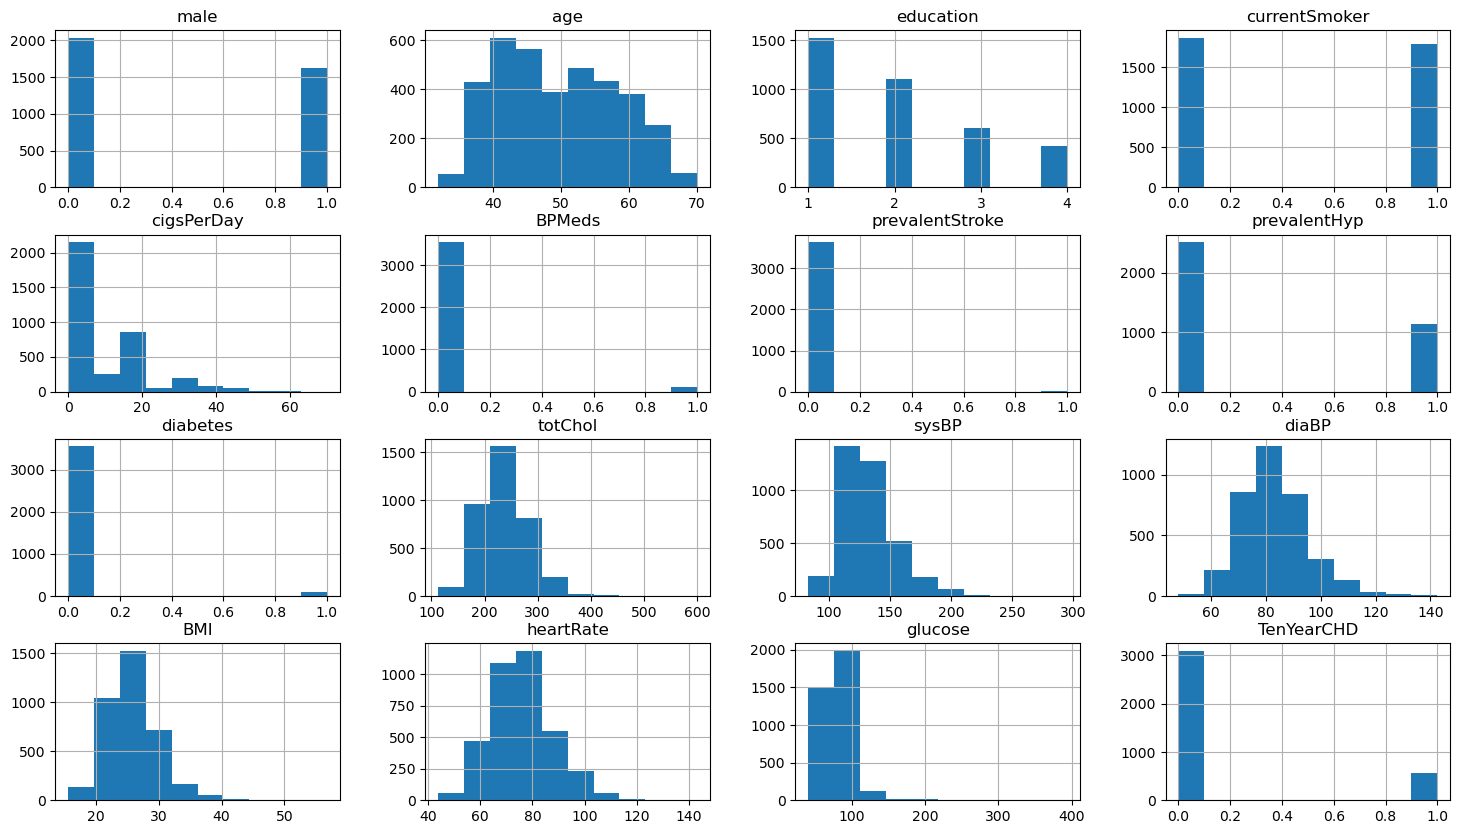

In [12]:
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(18,10))
plt.show

c:\Users\PC\anaconda3\envs\machinelearning\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


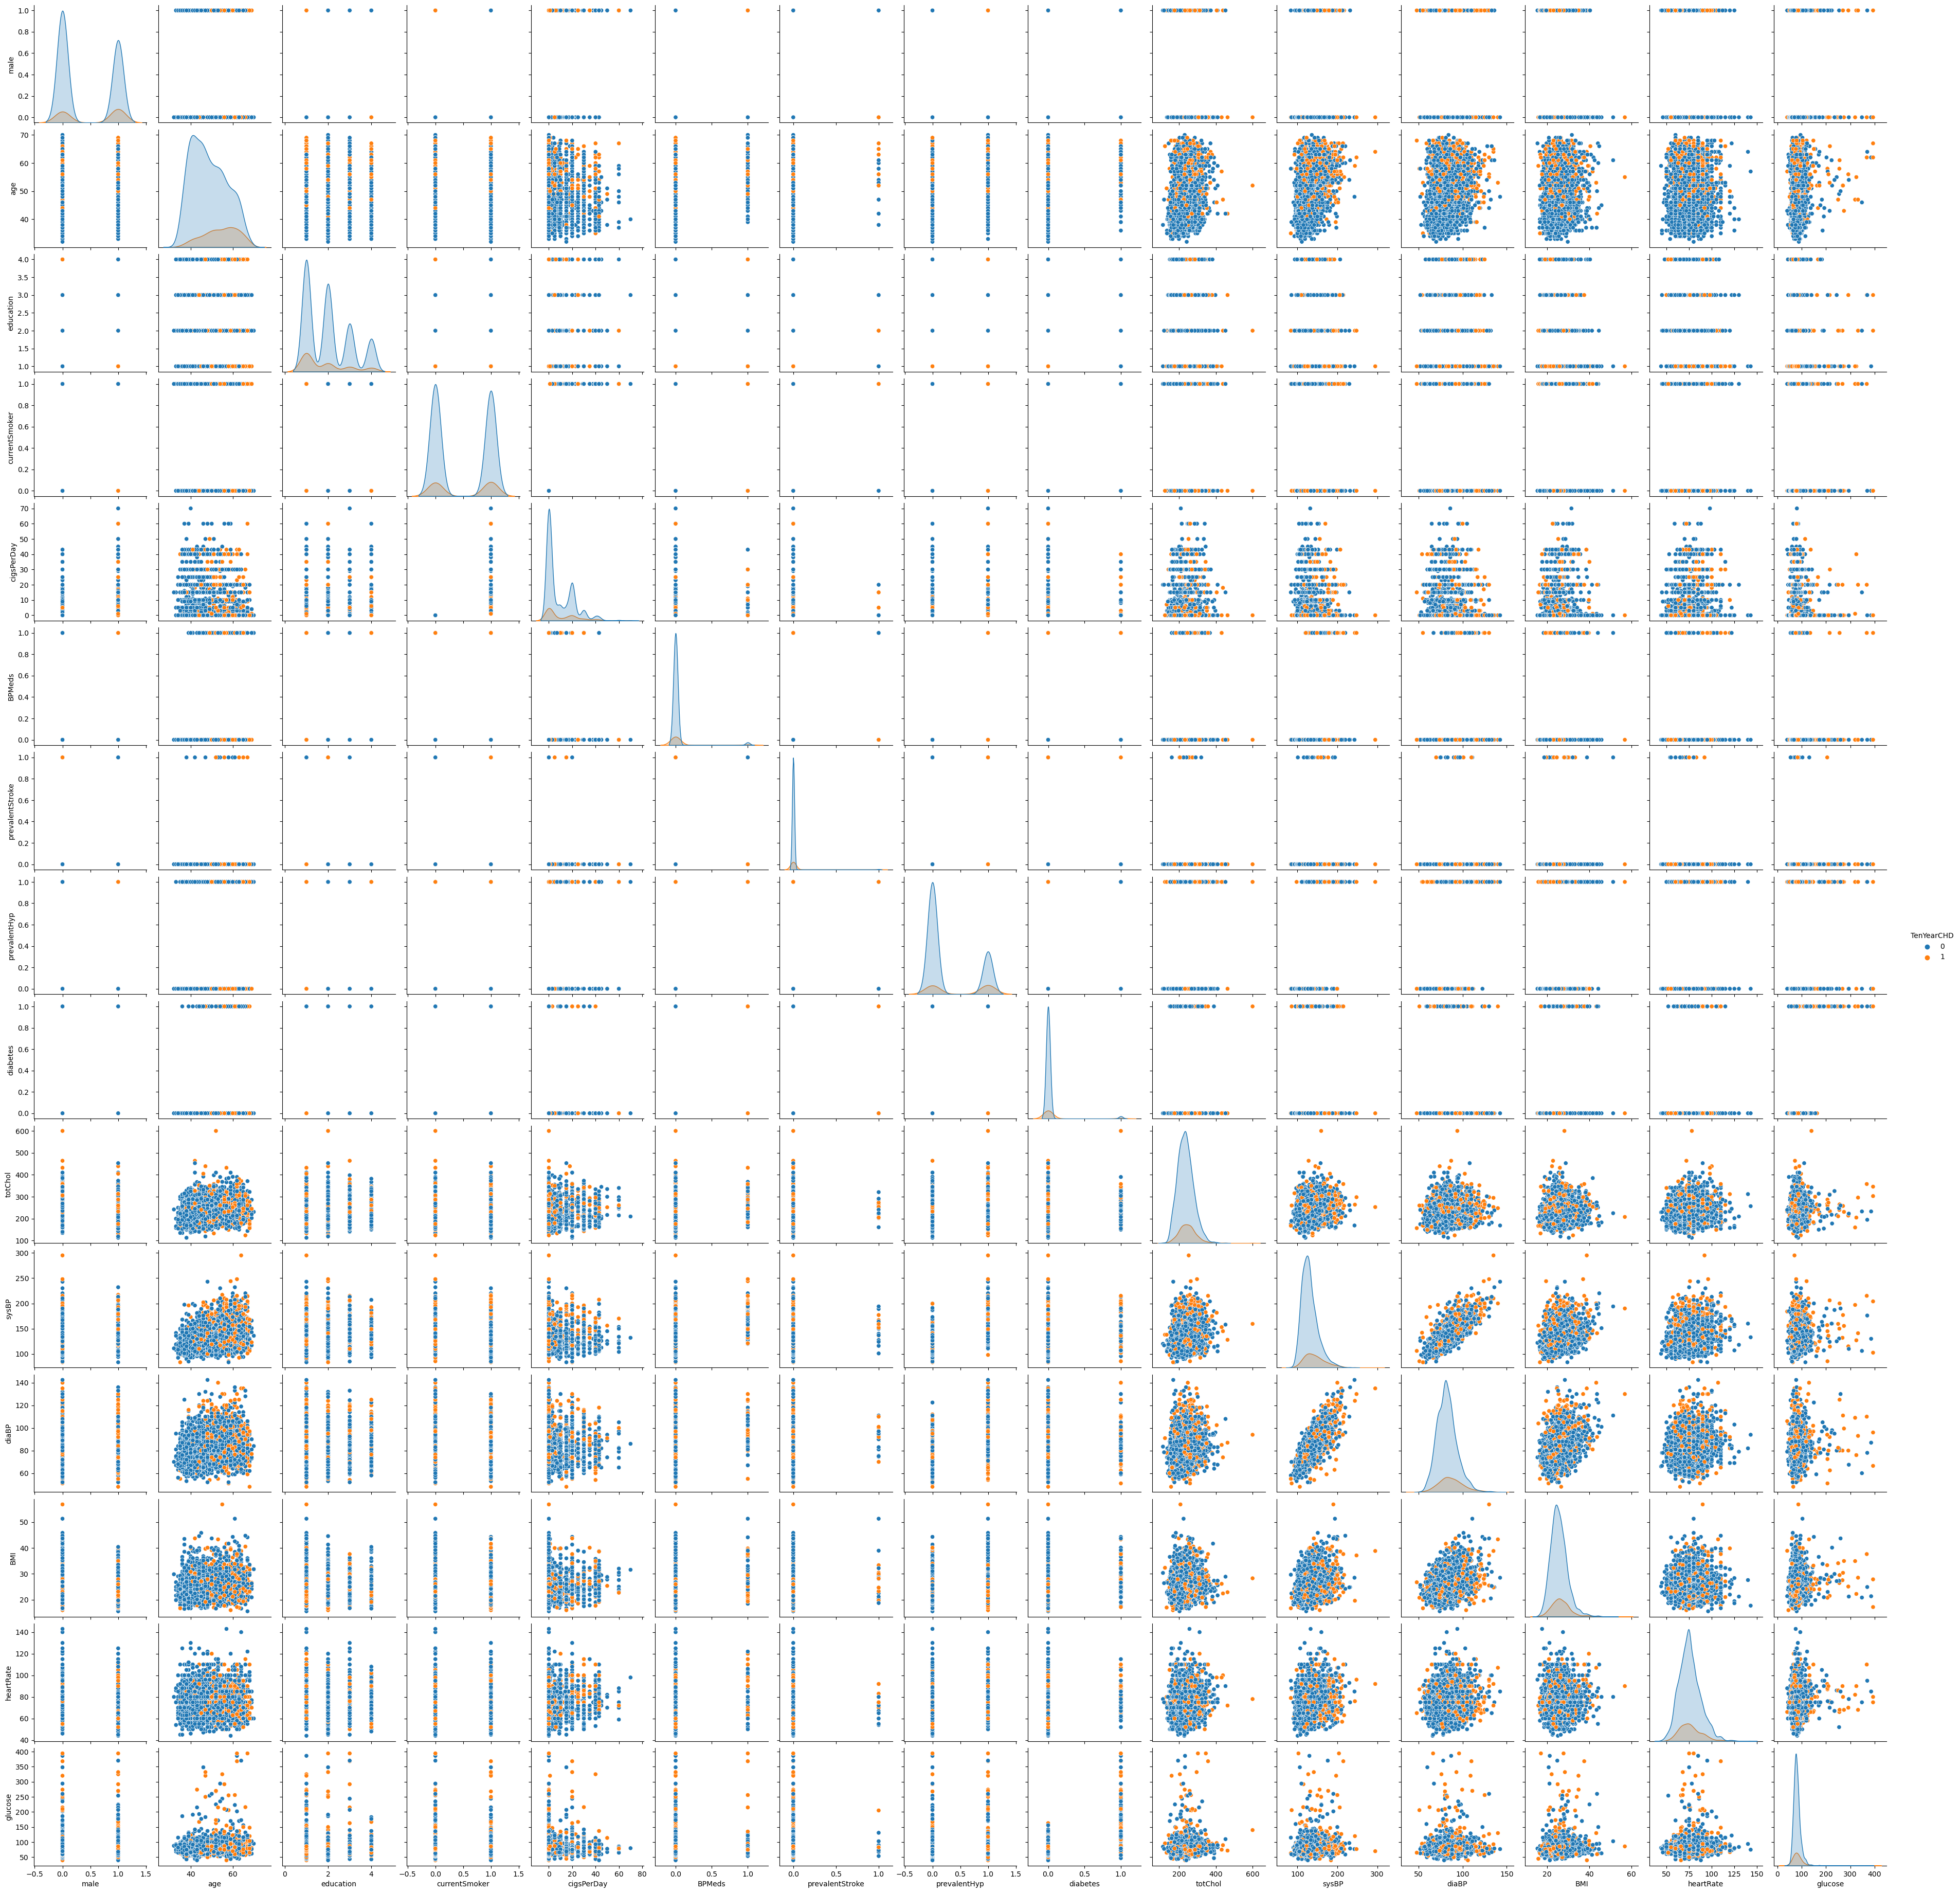

In [13]:
#pairplot to visualize the relatioship between features
sns.pairplot(data,hue='TenYearCHD')

Correlation Analysis

Compute the correlation matrix to understand the relationships between numerical variables.

Visualize correlations using a heatmap.


In [14]:
#correlation of the variables
correlation_matrix = data.corr()
correlation_matrix

male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.024387   0.017677       0.206778    0.331243   
age             -0.024387  1.000000  -0.158961      -0.210862   -0.189099   
education        0.017677 -0.158961   1.000000       0.025253    0.013527   
currentSmoker    0.206778 -0.210862   0.025253       1.000000    0.773819   
cigsPerDay       0.331243 -0.189099   0.013527       0.773819    1.000000   
BPMeds          -0.052128  0.134670  -0.013647      -0.051936   -0.046479   
prevalentStroke -0.002308  0.050864  -0.030353      -0.038159   -0.036283   
prevalentHyp     0.000806  0.306693  -0.079100      -0.107561   -0.069890   
diabetes         0.013833  0.109027  -0.039547      -0.041859   -0.036934   
totChol         -0.070229  0.267764  -0.012956      -0.051119   -0.030222   
sysBP           -0.045484  0.388551  -0.124511      -0.134371   -0.094764   
diaBP            0.051575  0.208880  -0.058502      -0.115748   -0.056650   
BMI              0.072867  0.137172  -0.137280      -0.159574   -0.086888   
heartRate       -0.114923 -0.002685  -0.064254       0.050452    0.063549   
glucose          0.003048  0.118245  -0.031874      -0.053346   -0.053803   
TenYearCHD       0.091745  0.233810  -0.063068       0.019176    0.052159   

                   BPMeds  prevalentStroke  prevalentHyp  diabetes   totChol  \
male            -0.052128        -0.002308      0.000806  0.013833 -0.070229   
age              0.134670         0.050864      0.306693  0.109027  0.267764   
education       -0.013647        -0.030353     -0.079100 -0.039547 -0.012956   
currentSmoker   -0.051936        -0.038159     -0.107561 -0.041859 -0.051119   
cigsPerDay      -0.046479        -0.036283     -0.069890 -0.036934 -0.030222   
BPMeds           1.000000         0.113119      0.263047  0.049051  0.094011   
prevalentStroke  0.113119         1.000000      0.066098  0.009619  0.012697   
prevalentHyp     0.263047         0.066098      1.000000  0.080623  0.167074   
diabetes         0.049051         0.009619      0.080623  1.000000  0.048371   
totChol          0.094011         0.012697      0.167074  0.048371  1.000000   
sysBP            0.271291         0.061080      0.697790  0.102574  0.220130   
diaBP            0.199750         0.055878      0.617634  0.050767  0.174986   
BMI              0.105603         0.036478      0.302917  0.088970  0.120799   
heartRate        0.012894        -0.017020      0.147333  0.060996  0.093057   
glucose          0.054210         0.016051      0.087129  0.614817  0.049749   
TenYearCHD       0.089116         0.048351      0.181556  0.093397  0.091127   

                    sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  
male            -0.045484  0.051575  0.072867  -0.114923  0.003048    0.091745  
age              0.388551  0.208880  0.137172  -0.002685  0.118245    0.233810  
education       -0.124511 -0.058502 -0.137280  -0.064254 -0.031874   -0.063068  
currentSmoker   -0.134371 -0.115748 -0.159574   0.050452 -0.053346    0.019176  
cigsPerDay      -0.094764 -0.056650 -0.086888   0.063549 -0.053803    0.052159  
BPMeds           0.271291  0.199750  0.105603   0.012894  0.054210    0.089116  
prevalentStroke  0.061080  0.055878  0.036478  -0.017020  0.016051    0.048351  
prevalentHyp     0.697790  0.617634  0.302917   0.147333  0.087129    0.181556  
diabetes         0.102574  0.050767  0.088970   0.060996  0.614817    0.093397  
totChol          0.220130  0.174986  0.120799   0.093057  0.049749    0.091127  
sysBP            1.000000  0.786727  0.331004   0.184901  0.134702    0.222885  
diaBP            0.786727  1.000000  0.385611   0.179008  0.063704    0.150342  
BMI              0.331004  0.385611  1.000000   0.074401  0.083671    0.081931  
heartRate        0.184901  0.179008  0.074401   1.000000  0.097026    0.020523  
glucose          0.134702  0.063704  0.083671   0.097026  1.000000    0.121942  
TenYearCHD       0.222885  0.150342  0.081931   0.0205

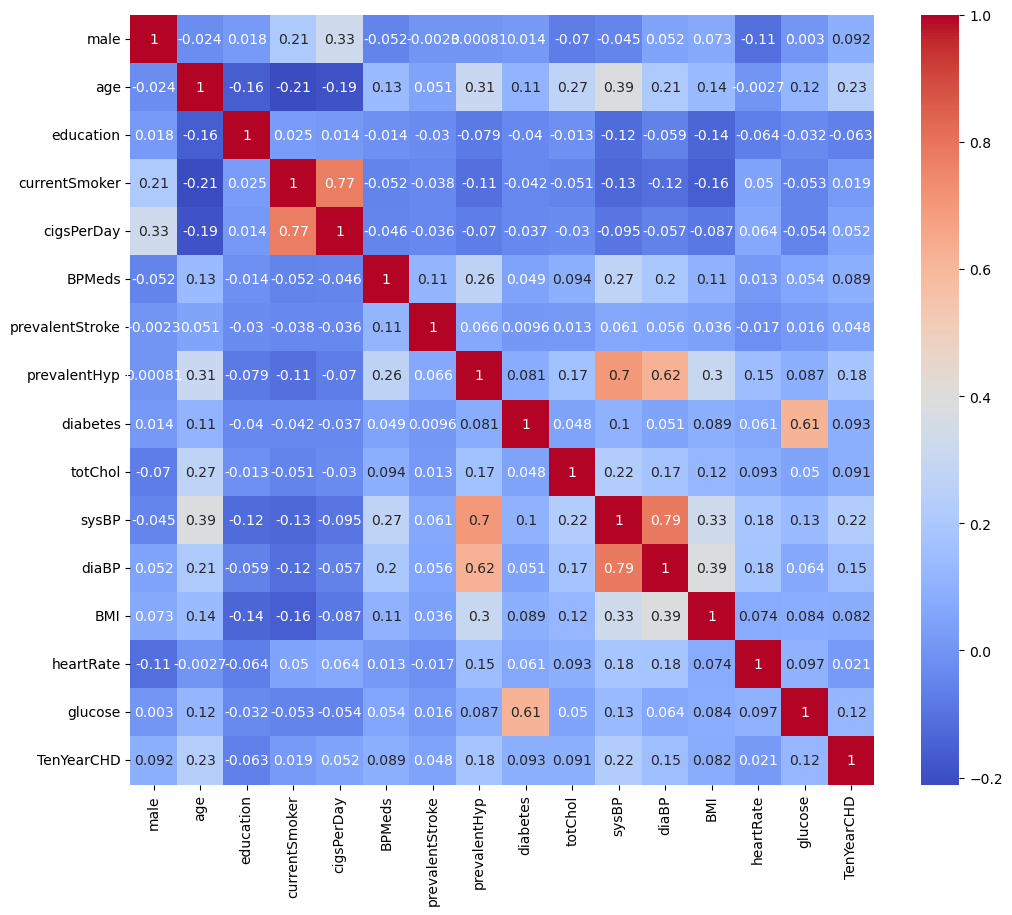

In [17]:
#Creating a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

Implementing the Logistic Regression

You should not scale the target variables (y_train and y_test) in logistic regression or any other type of regression or classification problem. Scaling is typically applied only to the feature variables (X) because it's a preprocessing step aimed at putting all features on the same scale. The target variable (y) in classification problems represents the class labels, and scaling doesn't apply to class labels.

In logistic regression, you are modeling the probability of a binary outcome (e.g., 0 or 1) based on the values of your features. You're trying to find the relationship between the features and the probability of the outcome. The target variable y should remain in its original form with the binary class labels (e.g., 0 and 1) for logistic regression to work correctly.

So, in summary:

Standardize (scale) the feature variables (X) using StandardScaler as demonstrated in the code provided.
Do not scale or modify the target variable (y). It should remain in its original binary form.
Scaling the target variable would not provide any benefit and could potentially introduce issues when interpreting the model's output or making predictions.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
#Assigning the variables to the respective features(X) and Target variables(y)
X = data.drop('TenYearCHD',axis=1)
y = data['TenYearCHD']

In [22]:
#Splitting the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [32]:
#Standardizing the features --- NB: ONLY FEATURES ARE STANDARDIZED AND NOT THE TARGET VARIABLES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#Train and fit the logstic model
model =LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [27]:
#Making predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
#Evaluating the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy= accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)


#Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix score: {conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8360655737704918
Confusion Matrix score: [[602   8]
 [112  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732



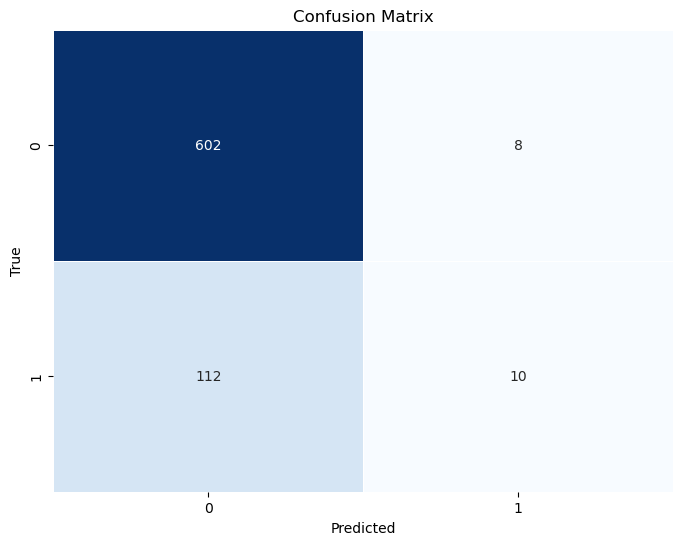

In [42]:
#Displaying the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",linewidths=0.5,cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The results you've obtained from your logistic regression model evaluation include accuracy, a confusion matrix, and a classification report. Let's break down and interpret these results:

Accuracy: Accuracy is a measure of the overall correctness of your model's predictions. It's the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances in the test dataset.

Accuracy: 0.8360655737704918 (83.61%)
An accuracy of 83.61% means that your model correctly predicted the outcome for approximately 83.61% of the samples in the test set. While accuracy is a commonly used metric, it may not be the most informative when dealing with imbalanced datasets.

Confusion Matrix:


[[602   8]
 [112  10]]
True Positives (TP): 10
False Positives (FP): 8
True Negatives (TN): 602
False Negatives (FN): 112
The confusion matrix provides a breakdown of the model's predictions. It shows that your model correctly predicted 10 instances with a TenYearCHD of 1 (positive cases), correctly predicted 602 instances with a TenYearCHD of 0 (negative cases), but incorrectly predicted 8 instances as positive when they were actually negative and 112 instances as negative when they were actually positive.

Classification Report:

              precision    recall  f1-score   support
0             0.84      0.99      0.91       610
1             0.56      0.08      0.14       122

accuracy                          0.84       732
macro avg     0.70      0.53      0.53       732
weighted avg  0.80      0.84      0.78       732
Precision: Precision is a measure of how many of the predicted positive cases were actually positive. For class 1 (TenYearCHD = 1), the precision is 0.56, indicating that about 56% of the predicted positive cases were true positives.

Recall: Recall (also called sensitivity or true positive rate) measures how many of the actual positive cases were correctly predicted. For class 1, the recall is 0.08, indicating that only 8% of the actual positive cases were correctly predicted.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 1, the F1-score is 0.14.

Support: The number of instances of each class in the test set.

The classification report provides a more detailed evaluation of the model's performance, especially for imbalanced datasets. In this case, the low recall for class 1 suggests that the model is not performing well in identifying positive cases (cases with TenYearCHD = 1).

Overall, while accuracy is relatively high, the model's performance, especially for predicting positive cases (TenYearCHD = 1), is not satisfactory. Depending on the specific application and requirements, you may need to consider further model tuning, addressing class imbalance, or exploring different algorithms to improve performance on positive cases.

In [37]:
#make preictions using some random data
#create a dictionary wit random data in it
# Create a dictionary with random data for features
random_data = {
    'male': [0],          # Replace with your random values
    'age': [55],          # Replace with your random values
    'education': [2],     # Replace with your random values
    'currentSmoker': [1], # Replace with your random values
    'cigsPerDay': [15],   # Replace with your random values
    'BPMeds': [0],        # Replace with your random values
    'prevalentStroke': [0],# Replace with your random values
    'prevalentHyp': [0],  # Replace with your random values
    'diabetes': [0],      # Replace with your random values
    'totChol': [220],     # Replace with your random values
    'sysBP': [120],       # Replace with your random values
    'diaBP': [80],        # Replace with your random values
    'BMI': [28],          # Replace with your random values
    'heartRate': [75],    # Replace with your random values
    'glucose': [85]       # Replace with your random values
}

#Convert the dictionary to dataFrames
random_df =pd.DataFrame(random_data)

#Standardiza the random data using the same scaler
scaler = StandardScaler()
random_data_scaled = scaler.fit_transform(random_df)

#Make predictions using the logistic model
predictions = model.predict(random_data_scaled)

#print the predictions
print("predited CHD:",predictions[0])

predited CHD: 0


In [38]:
#saving the model using joblib
import joblib

model_filename = 'heart_diseases_logistic_model.pkl'
joblib.dump(model,model_filename)

print(f"Model saved as '{model_filename}")

Model saved as 'heart_diseases_logistic_model.pkl


In [40]:
#unloading the saved model
loaded_model = joblib.load(model_filename)
loaded_model

LogisticRegression()

In [41]:
#make preictions using some random data   ----------------------------USING THE LOADED MODEL------------------------------------
#create a dictionary wit random data in it
# Create a dictionary with random data for features
random_data = {
    'male': [0],          # Replace with your random values
    'age': [55],          # Replace with your random values
    'education': [2],     # Replace with your random values
    'currentSmoker': [1], # Replace with your random values
    'cigsPerDay': [15],   # Replace with your random values
    'BPMeds': [0],        # Replace with your random values
    'prevalentStroke': [0],# Replace with your random values
    'prevalentHyp': [0],  # Replace with your random values
    'diabetes': [0],      # Replace with your random values
    'totChol': [220],     # Replace with your random values
    'sysBP': [120],       # Replace with your random values
    'diaBP': [80],        # Replace with your random values
    'BMI': [28],          # Replace with your random values
    'heartRate': [75],    # Replace with your random values
    'glucose': [85]       # Replace with your random values
}

#Convert the dictionary to dataFrames
random_df =pd.DataFrame(random_data)

#Standardiza the random data using the same scaler
scaler = StandardScaler()
random_data_scaled = scaler.fit_transform(random_df)

#Make predictions using the logistic model
predictions = loaded_model.predict(random_data_scaled)

#print the predictions.
print("predited CHD:",predictions[0])

predited CHD: 0
